# task-03

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [2]:
# Example: Using Apple Inc. stock data from Yahoo Finance
data = pd.read_csv('stock_list (1).csv')
data

,SecuritiesCode,EffectiveDate,Name,Section/Products,NewMarketSegment,33SectorCode,33SectorName,17SectorCode,17SectorName,NewIndexSeriesSizeCode,NewIndexSeriesSize,TradeDate,Close,IssuedShares,MarketCapitalization,Universe0
0,1301,20211230,"KYOKUYO CO.,LTD.",First Section (Domestic),Prime Market,50,"Fishery, Agriculture and Forestry",1,FOODS,7,TOPIX Small 2,20211230.0,3080.0,1.092828e+07,3.365911e+10,True
1,1305,20211230,Daiwa ETF-TOPIX,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2097.0,3.634636e+09,7.621831e+12,False
2,1306,20211230,NEXT FUNDS TOPIX Exchange Traded Fund,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2073.5,7.917718e+09,1.641739e+13,False
3,1308,20211230,Nikko Exchange Traded Index Fund TOPIX,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2053.0,3.736943e+09,7.671945e+12,False
4,1309,20211230,NEXT FUNDS ChinaAMC SSE50 Index Exchange Trade...,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,44280.0,7.263200e+04,3.216145e+09,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4412,9994,20211230,YAMAYA CORPORATION,First Section (Domestic),Standard Market,6100,Retail Trade,14,RETAIL TRADE,7,TOPIX Small 2,20211230.0,2447.0,1.084787e+07,2.654474e+10,True
4413,9995,20211230,"GLOSEL Co.,Ltd.",First Section (Domestic),Prime Market,6050,Wholesale Trade,13,COMMERCIAL & WHOLESALE TRADE,7,TOPIX Small 2,20211230.0,410.0,2.642680e+07,1.083499e+10,False
4414,9996,20211230,"Satoh&Co.,Ltd.",JASDAQ(Standard / Domestic),Standard Market,6050,Wholesale Trade,13,COMMERCIAL & WHOLESALE TRADE,-,-,20211230.0,1488.0,9.152640e+06,1.361913e+10,False
4415,9997,20211230,"BELLUNA CO.,LTD.",First Section (Domestic),Prime Market,6100,Retail Trade,14,RETAIL TRADE,6,TOPIX Small 1,20211230.0,709.0,9.724447e+07,6.894633e+10,True


In [3]:
# Keep only relevant columns (e.g., 'TradeDate', 'Close')
data = data[['TradeDate', 'Close']]
data

,TradeDate,Close
0,20211230.0,3080.0
1,20211230.0,2097.0
2,20211230.0,2073.5
3,20211230.0,2053.0
4,20211230.0,44280.0
...,...,...
4412,20211230.0,2447.0
4413,20211230.0,410.0
4414,20211230.0,1488.0
4415,20211230.0,709.0


In [4]:
# Convert 'TradeDate' to datetime format
data['TradeDate'] = data['TradeDate'].astype(int)
data['TradeDate'] = pd.to_datetime(data['TradeDate'])
import warnings
warnings.filterwarnings('ignore')

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [6]:
data['TradeDate'].isnull().sum()

296

In [5]:
data['TradeDate'].value_counts()

20211230.0    4049
20211229.0      37
20211228.0      18
20211227.0       6
20211220.0       3
20211221.0       2
20211222.0       2
20211223.0       2
20211216.0       1
20211224.0       1
Name: TradeDate, dtype: int64

In [ ]:
# Sort dataframe by 'TradeDate' in ascending order
data.sort_values(by='TradeDate', inplace=True)


In [ ]:
# Set 'TradeDate' as index
data.set_index('TradeDate', inplace=True)

In [ ]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data['Close'] = scaler.fit_transform(data[['Close']])

In [9]:
# Define function to create dataset for LSTM
def create_dataset(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

In [10]:
# Convert dataframe to numpy array
data = data.values


In [11]:
# Define the time step
time_step = 60


In [12]:
# Create input features and target variable
X, y = create_dataset(data, time_step)


In [13]:
# Reshape input to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


In [14]:
# Split data into train and test sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size, :], X[train_size:len(X), :]
y_train, y_test = y[0:train_size], y[train_size:len(X)]

In [15]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [16]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [17]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100

109/109 [==============================] - 18s 77ms/step - loss: 0.0026
Epoch 2/100
109/109 [==============================] - 9s 79ms/step - loss: 0.0026
Epoch 3/100
109/109 [==============================] - 9s 80ms/step - loss: 0.0024
Epoch 4/100
109/109 [==============================] - 8s 78ms/step - loss: 0.0023
Epoch 5/100
109/109 [==============================] - 9s 78ms/step - loss: 0.0023
Epoch 6/100
109/109 [==============================] - 8s 77ms/step - loss: 0.0022
Epoch 7/100
109/109 [==============================] - 9s 85ms/step - loss: 0.0022
Epoch 8/100
109/109 [==============================] - 9s 81ms/step - loss: 0.0023
Epoch 9/100
109/109 [==============================] - 9s 80ms/step - loss: 0.0023
Epoch 10/100
109/109 [==============================] - 9s 80ms/step - loss: 0.0023
Epoch 11/100
109/109 [==============================] - 9s 80ms/step - loss: 0.0022
Epoch 12/100
109/109 [==============================] - 9s 80ms/step - loss: 0.0023

In [18]:
# Get the predicted values
predictions = model.predict(X_test)

28/28 [==============================] - 3s 29ms/step


In [19]:
# Inverse transform the predictions
predictions = scaler.inverse_transform(predictions)

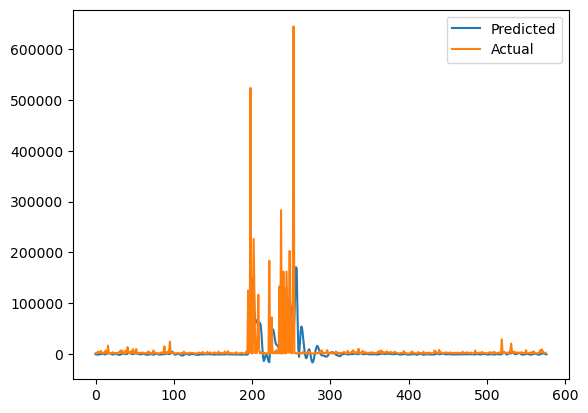

In [20]:
# Plot the predicted values against actual values
plt.plot(predictions, label='Predicted')
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual')
plt.legend()
plt.show()